# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Behzad | Nourollahkhani | Behzad Nourollahkhani (Sept 24, 2024) | 7 | 25% |
| Member 2: | Bernard | Gyasi | Bernard Gyasi (Sept 24, 2024) | 7 | 25% |
| Member 3: | Faezeh  | Yousefzadeh | Faezeh Yousefzadeh (Sept 24, 2024) | 7 | 25% |
| Member 4: | Rashid | Bawah | Rashid Bawah (Sept 24, 2024) | 7 | 25% |

# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

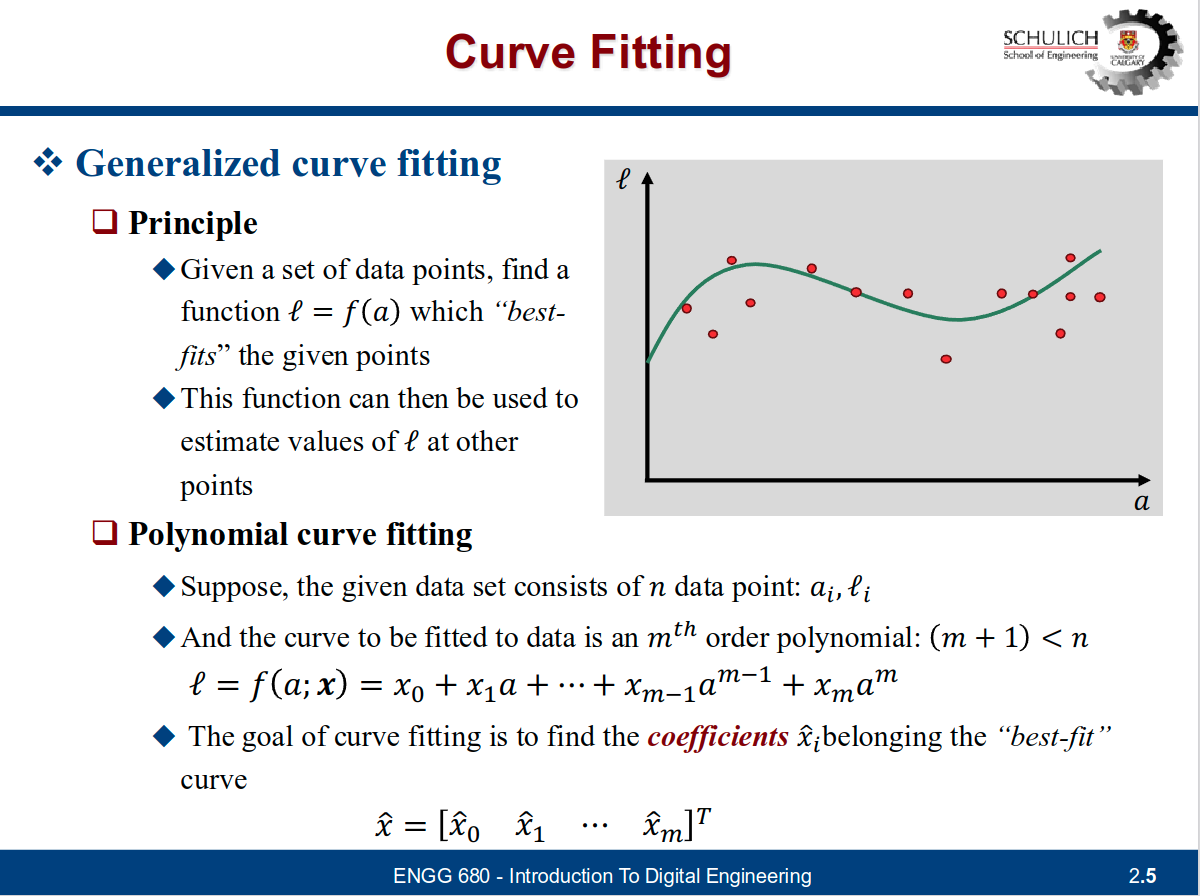

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel("data.xlsx")
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]
l_var = arr_data[:, 1]
l_true = arr_data[:, 2]

In [3]:
# step 3
# define the number of observation n
# (1 mark)
n = arr_data.shape[0]

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


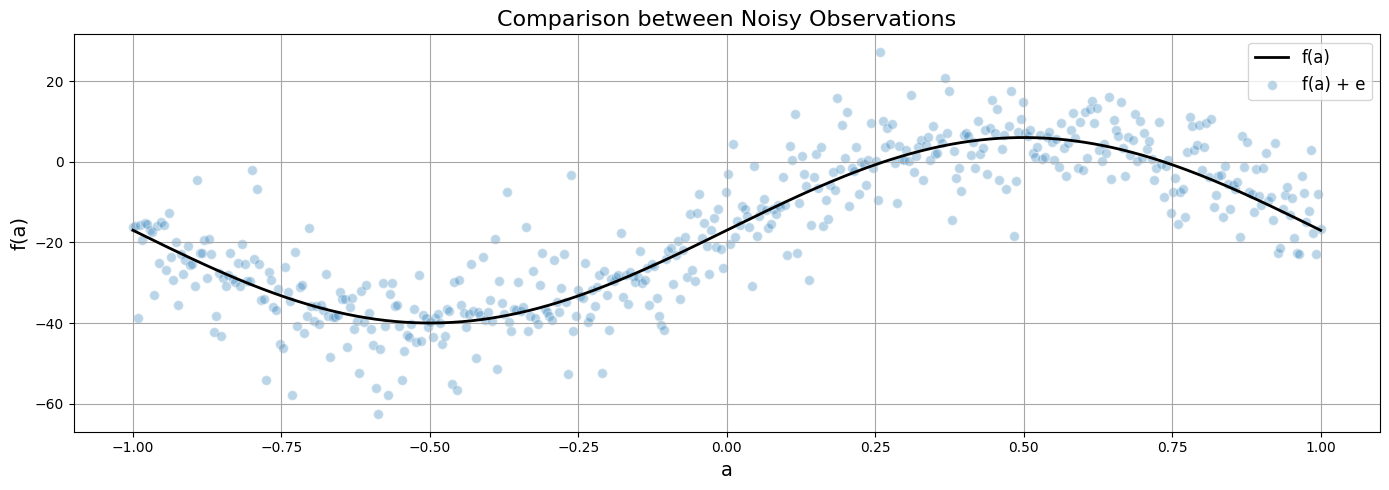

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

a = a/np.pi

# true observations as a solid black line
ax.plot(a, l_true, label='f(a)', color='k', linewidth=2)

# noisy observations as scatter points
ax.scatter(
    a,
    l,
    label='f(a) + e',
    color='tab:blue',
    marker='o',
    alpha=0.3,
    edgecolors='w',
    s=50
)

ax.set_xlabel('a', fontsize=14)
ax.set_ylabel('f(a)', fontsize=14)
ax.set_title('Comparison between Noisy Observations', fontsize=16)
ax.grid(True, which='both', ls='-', color='0.65')
ax.legend(fontsize=12)
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    A = np.vander(a, deg+1, increasing=True)
    
    # Calculate (A^T P A)
    ATPA = A.T @ P @ A
    
    # Calculate (A^T P l)
    ATPL = A.T @ P @ l
    
    # Solve for the polynomial coefficients 'x'
    x = np.linalg.solve(ATPA, ATPL)
    
    # Residuals v = l - A * x
    v = l - A @ x
    
    # posteriori variance factor (goodness of fit)
    # apv = (v^T P v) / (number of observations - number of parameters)
    # The number of parameters is (deg + 1) because we have a polynomial of degree 'deg'
    num_obs = len(l)
    num_params = deg + 1
    apv = (v.T @ P @ v) / (num_obs - num_params)
    
    # the covariance matrix of the estimated coefficients
    # cov_x = apv * (ATPA)^-1
    cov_x = apv * np.linalg.inv(ATPA)
    
    return (x, cov_x, apv, v)

In [6]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

first_deg = fit_polynomial_curve(a=a, l=l, P=P, deg=1)
x1, cov_x1, apv1, v1 = first_deg
# print(f"APV: {apv1}")
third_deg = fit_polynomial_curve(a=a, l=l, P=P, deg=3)
x3, cov_x3, apv3, v3 = third_deg
# print(f"APV: {apv3}")
fifth_deg = fit_polynomial_curve(a=a, l=l, P=P, deg=5)
x5, cov_x5, apv5, v5 = fifth_deg
# print(f"APV: {apv5}")

In [7]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x1[::-1], a)  # For degree 1
cubic_uw = np.polyval(x3[::-1], a)  # For degree 3
quintic_uw = np.polyval(x5[::-1], a)  # For degree 5

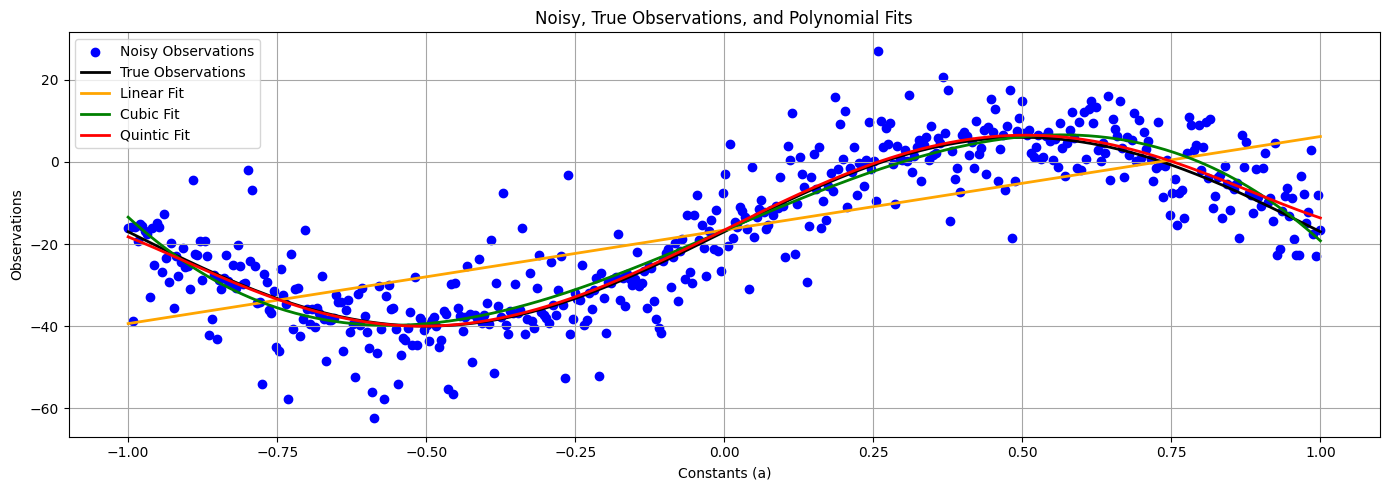

In [8]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, label='Noisy Observations', color='blue')
ax.plot(a, l_true, label='True Observations', color='black', linewidth=2)

ax.plot(a, line_uw, label='Linear Fit', color='orange', linewidth=2)
ax.plot(a, cubic_uw, label='Cubic Fit', color='green', linewidth=2)
ax.plot(a, quintic_uw, label='Quintic Fit', color='red', linewidth=2)

ax.set_xlabel('Constants (a)')
ax.set_ylabel('Observations')
ax.set_title('Noisy, True Observations, and Polynomial Fits')

ax.grid(True, which='both', ls='-', color='0.65')
ax.legend()

fig.tight_layout()

In [9]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

print(f"Degree 1: APV = {apv1:.4f}")
print(f"Degree 3: APV = {apv3:.4f}")
print(f"Degree 5: APV = {apv5:.4f}")

Degree 1: APV = 162.7426
Degree 3: APV = 66.1323
Degree 5: APV = 63.7583


In [10]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
line_norm = np.linalg.norm(line_uw - l_true)
cubic_norm = np.linalg.norm(cubic_uw - l_true)
quintic_norm = np.linalg.norm(quintic_uw - l_true)

print(f"Norm between Linear Fit and True Observations: {line_norm:.4f}")
print(f"Norm between Cubic Fit and True Observations: {cubic_norm:.4f}")
print(f"Norm between Quintic Fit and True Observations: {quintic_norm:.4f}")

Norm between Linear Fit and True Observations: 229.0602
Norm between Cubic Fit and True Observations: 38.2860
Norm between Quintic Fit and True Observations: 17.3700


In [11]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...

print("""
      The a posteriori variance factor (APV) and the norm between predicted and true observations 
      both show a clear improvement in the fit as the polynomial degree increases. 
      The APV decreases from 162.74 (linear) to 66.13 (cubic) and 63.76 (quintic), 
      indicating that higher-degree polynomials provide a better fit to the noisy data. 
      Similarly, the norm between the predicted and true values shows a significant reduction 
      from 229.06 (linear) to 38.29 (cubic) and 17.37 (quintic), confirming that higher-degree 
      polynomials are closer to the true underlying trend.
      
      This pattern reveals that increasing the polynomial degree leads to a better fit. 
      However, while higher-degree polynomials like the quintic fit provide a closer approximation to 
      the true observations, they may also capture noise in the data, leading to potential overfitting. 
      This suggests that while more complex models perform better on this dataset, care should be taken to ensure they generalize well.
      """)


      The a posteriori variance factor (APV) and the norm between predicted and true observations 
      both show a clear improvement in the fit as the polynomial degree increases. 
      The APV decreases from 162.74 (linear) to 66.13 (cubic) and 63.76 (quintic), 
      indicating that higher-degree polynomials provide a better fit to the noisy data. 
      Similarly, the norm between the predicted and true values shows a significant reduction 
      from 229.06 (linear) to 38.29 (cubic) and 17.37 (quintic), confirming that higher-degree 
      polynomials are closer to the true underlying trend.
      
      This pattern reveals that increasing the polynomial degree leads to a better fit. 
      However, while higher-degree polynomials like the quintic fit provide a closer approximation to 
      the true observations, they may also capture noise in the data, leading to potential overfitting. 
      This suggests that while more complex models perform better on this dataset, care s

In [12]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)
P[:5, :5]

array([[0.02777778, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00694444, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00591716, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00591716, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.25      ]])


Degree 1: APV = 12.0547
Degree 3: APV = 1.1445
Degree 5: APV = 0.9447

Norm between Linear Fit and True Observations: 230.6776
Norm between Cubic Fit and True Observations: 36.0703
Norm between Quintic Fit and True Observations: 5.7416


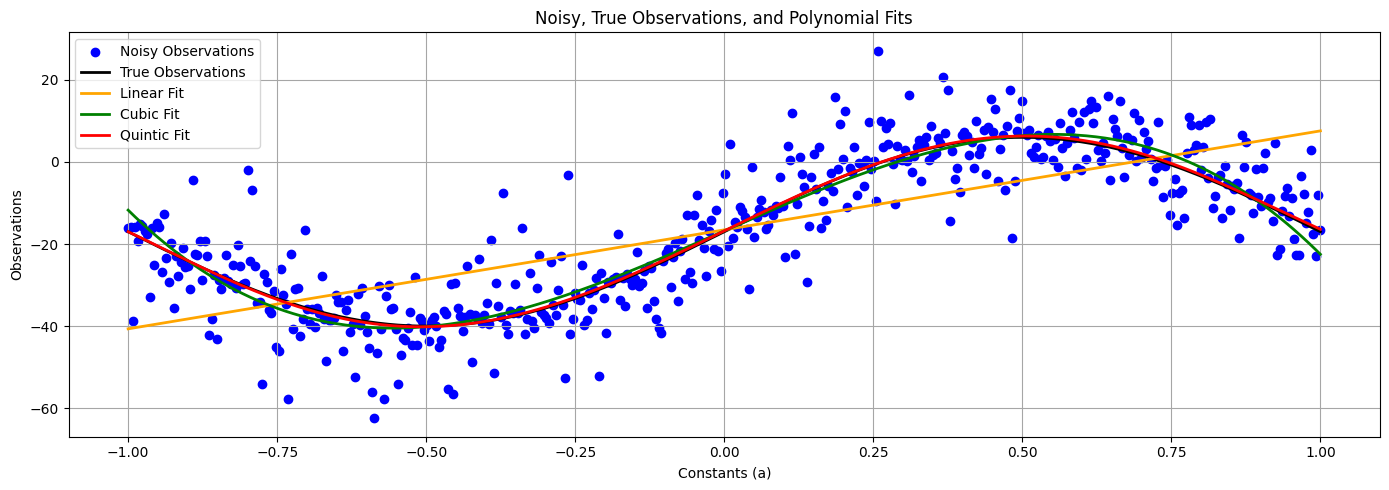

In [13]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...

first_deg = fit_polynomial_curve(a=a, l=l, P=P, deg=1)
x1, cov_x1, apv1, v1 = first_deg
# print(f"APV: {apv1}")
third_deg = fit_polynomial_curve(a=a, l=l, P=P, deg=3)
x3, cov_x3, apv3, v3 = third_deg
# print(f"APV: {apv3}")
fifth_deg = fit_polynomial_curve(a=a, l=l, P=P, deg=5)
x5, cov_x5, apv5, v5 = fifth_deg
# print(f"APV: {apv5}")

line_uw = np.polyval(x1[::-1], a)  # For degree 1
cubic_uw = np.polyval(x3[::-1], a)  # For degree 3
quintic_uw = np.polyval(x5[::-1], a)  # For degree 5

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a, l, label='Noisy Observations', color='blue')
ax.plot(a, l_true, label='True Observations', color='black', linewidth=2)

ax.plot(a, line_uw, label='Linear Fit', color='orange', linewidth=2)
ax.plot(a, cubic_uw, label='Cubic Fit', color='green', linewidth=2)
ax.plot(a, quintic_uw, label='Quintic Fit', color='red', linewidth=2)

ax.set_xlabel('Constants (a)')
ax.set_ylabel('Observations')
ax.set_title('Noisy, True Observations, and Polynomial Fits')

ax.grid(True, which='both', ls='-', color='0.65')
ax.legend()

fig.tight_layout()

print()
print(f"Degree 1: APV = {apv1:.4f}")
print(f"Degree 3: APV = {apv3:.4f}")
print(f"Degree 5: APV = {apv5:.4f}")

print()
line_norm = np.linalg.norm(line_uw - l_true)
cubic_norm = np.linalg.norm(cubic_uw - l_true)
quintic_norm = np.linalg.norm(quintic_uw - l_true)

print(f"Norm between Linear Fit and True Observations: {line_norm:.4f}")
print(f"Norm between Cubic Fit and True Observations: {cubic_norm:.4f}")
print(f"Norm between Quintic Fit and True Observations: {quintic_norm:.4f}")

In [14]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...
print(
    """
    The results show that both the a posteriori variance factor (APV) and the norm significantly 
    decrease when using the weighted least squares estimation (LSE) compared to the unweighted LSE. 
    In the unweighted LSE, the APVs were much larger (e.g., 162.74 for degree 1) and the norms were 
    higher (229.06 for linear) due to all observations being treated equally. In contrast, the weighted 
    LSE gives more importance to observations with lower variance (more reliable data) and less weight 
    to those with higher variance (noisier data). This leads to a better fit, reflected by much lower 
    APVs (e.g., 12.05 for degree 1) and norms, particularly for higher-degree polynomials. 
    This phenomenon illustrates that weighting observations based on their variance improves model accuracy 
    by allowing the fit to prioritize more accurate data points, reducing the overall error and yielding 
    more reliable results.
    """
)


    The results show that both the a posteriori variance factor (APV) and the norm significantly 
    decrease when using the weighted least squares estimation (LSE) compared to the unweighted LSE. 
    In the unweighted LSE, the APVs were much larger (e.g., 162.74 for degree 1) and the norms were 
    higher (229.06 for linear) due to all observations being treated equally. In contrast, the weighted 
    LSE gives more importance to observations with lower variance (more reliable data) and less weight 
    to those with higher variance (noisier data). This leads to a better fit, reflected by much lower 
    APVs (e.g., 12.05 for degree 1) and norms, particularly for higher-degree polynomials. 
    This phenomenon illustrates that weighting observations based on their variance improves model accuracy 
    by allowing the fit to prioritize more accurate data points, reducing the overall error and yielding 
    more reliable results.
    


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

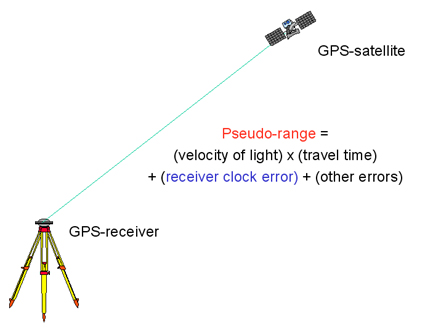

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$
and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [15]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel("pseudoranges.xlsx")
df_sat_pos = pd.read_excel("satellite_position.xlsx")

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [16]:
df_sat_pos.head()

,Satellite_ID,x,y,z
0,7,5.280792e+06,-2.550146e+07,4.649508e+06
1,8,-2.159656e+06,-2.111602e+07,1.559791e+07
2,11,1.037185e+07,-2.171311e+07,1.055869e+07
3,15,-1.608576e+07,4.285071e+06,2.074204e+07
4,17,-1.431299e+07,-2.204501e+07,4.671208e+06


In [17]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4

In [18]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [19]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(4)

In [20]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [21]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(4)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [22]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)
  return distance


In [23]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)

def design_matrix(r_pos, s_pos, rho):
  receiver_pos = r_pos[:3]
  A = (receiver_pos - s_pos) / rho[:, np.newaxis]
  A = np.hstack([A, -np.ones((A.shape[0], 1))])
  return A

In [24]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

convergence_threshold = 0.001
while np.linalg.norm(delta[:3]) >= convergence_threshold:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], df_sat_pos[['x', 'y', 'z']].to_numpy())

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, df_sat_pos[['x', 'y', 'z']].to_numpy(), rho)

       # compute the misclosure array w
       # (1 marks)
       w = df_pseudorange['P'].to_numpy() - (rho + x_hat[3])

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.solve(A.T @ P @ A, A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat += delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i+=1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)

       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)



# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
residuals = w - A @ delta
apv = (residuals.T @ P @ residuals) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)

In [25]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print(f"Estimated States (x_hat):\n{x_hat}\n")
print(f"Corrections Array (delta):\n{delta}\n")
print(f"Estimated Measurement Residuals (w - A @ delta):\n{residuals}\n")
print(f"A Posteriori Variance of Unit Weight (APV):\n{apv}\n")
print(f"Covariance Matrix of Estimated States (C_x_hat):\n{C_x_hat}\n")
print(f"Number of Iterations: {i}\n")
print(f"3-D Position Errors (err_pos): {err_pos}\n")

Estimated States (x_hat):
[ -1633492.44451686  -3651629.54237943   4952485.43270837
 -19967471.66324711]

Corrections Array (delta):
[ 3.22886102e-06  6.38903023e-06 -1.75741376e-05 -9.98373907e+06]

Estimated Measurement Residuals (w - A @ delta):
[ 0.2599757   0.11117279 -1.09950209 -0.00500054  0.20031684 -1.41815427
 -0.09126721  1.5120914   0.26365487  0.61138618 -0.34467367]

A Posteriori Variance of Unit Weight (APV):
0.8852888546365051

Covariance Matrix of Estimated States (C_x_hat):
[[ 0.28298264  0.06167139 -0.07487066  0.06468701]
 [ 0.06167139  0.37666273 -0.51441611  0.32601524]
 [-0.07487066 -0.51441611  1.81094828 -0.9773772 ]
 [ 0.06468701  0.32601524 -0.9773772   0.61904475]]

Number of Iterations: 5

3-D Position Errors (err_pos): 5.4316147367865515



In [26]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

The computed A Posteriori Variance of Unit Weight (APV) value of 
\(2.55 \times 10^{13}\) is extremely large, indicating a poor fit between the observed pseudoranges and the estimated states. This suggests that the model or the initial assumptions may not be accurately capturing the true receiver position or satellite data. Additionally, the large values in the covariance matrix of the estimated states suggest high uncertainty in the position estimates (x, y, z) and the clock bias. This uncertainty, combined with the high APV, implies that either the observations are very noisy, the initial estimates are far from the true values, or the model requires adjustment to better capture the system dynamics.


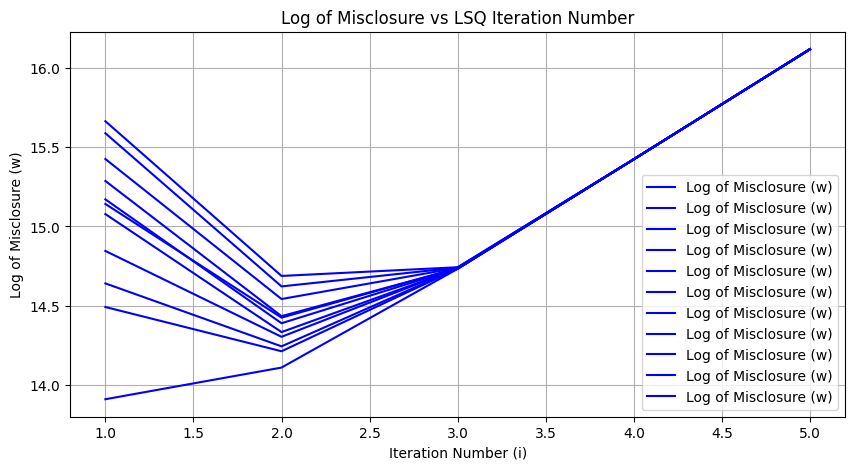

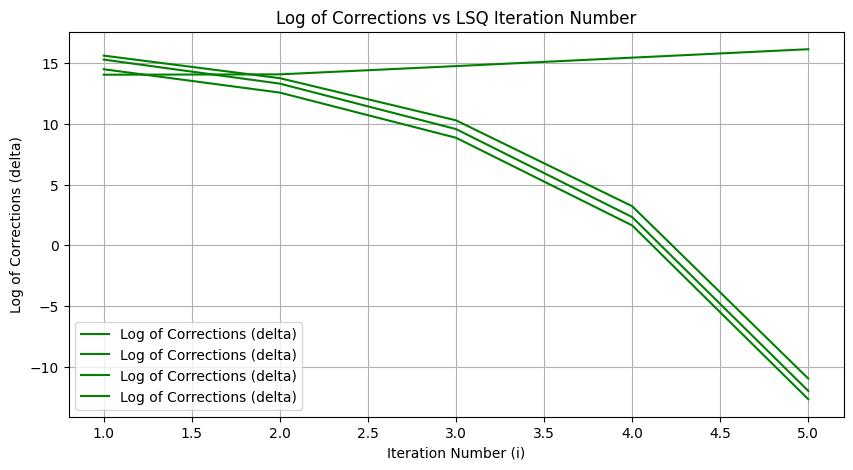

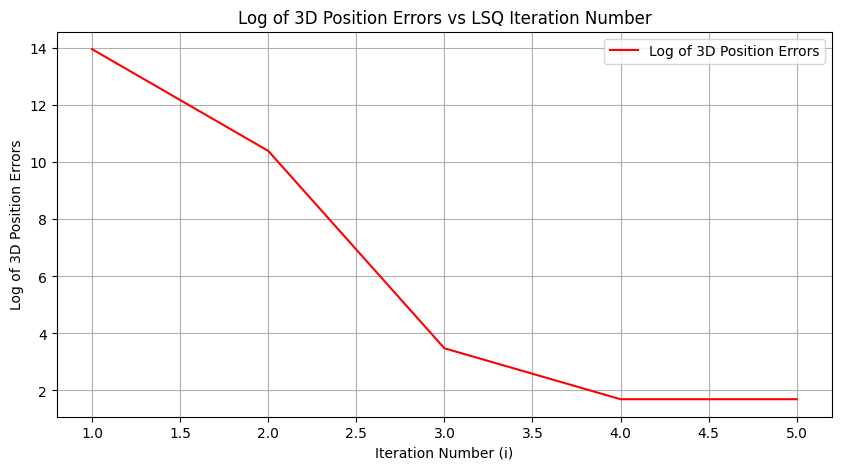

In [27]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# arr_i = np.arange(1, len(arr_w) + 1)
arr_i = np.array(arr_i)

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 5))
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure (w)', color='blue')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Misclosure (w)')
plt.title('Log of Misclosure vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 5))
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections (delta)', color='green')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Corrections (delta)')
plt.title('Log of Corrections vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 5))
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of 3D Position Errors', color='red')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
print(
    """
    The plots reveal a consistent pattern of convergence across all metrics. 
    The misclosure and corrections decrease sharply over the iterations, 
    reflecting the refinement of the estimated receiver position and clock bias. 
    Similarly, the 3D position errors rapidly decline, indicating that the algorithm 
    is homing in on the correct solution. This behavior is typical in least squares problems, 
    where the solution quickly converges after a few iterations as the system resolves the 
    discrepancies between the observed and predicted values.
    """
)


    The plots reveal a consistent pattern of convergence across all metrics. 
    The misclosure and corrections decrease sharply over the iterations, 
    reflecting the refinement of the estimated receiver position and clock bias. 
    Similarly, the 3D position errors rapidly decline, indicating that the algorithm 
    is homing in on the correct solution. This behavior is typical in least squares problems, 
    where the solution quickly converges after a few iterations as the system resolves the 
    discrepancies between the observed and predicted values.
    


In [29]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
